<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Loan Approval Prediction Problem </div>


<div style="padding:20px; 
            color: #4b0082;
            margin:10px;
            font-size:110%;
            text-align:right;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ff7f50;
            background-color:#ffd700;
            overflow:hidden;
            font-weight:500">
                Problem Statement: Loan Approval Prediction Problem
Type: Binary Classification Loan approval prediction is classic problem to learn and apply lots of data analysis techniques to create best Classification model.
Given with the dataset consisting of details of applicants for loan and status whether the loan application is approved or not. Basis on the a binary classification model is to be created 
with maximum accuracy.</div>

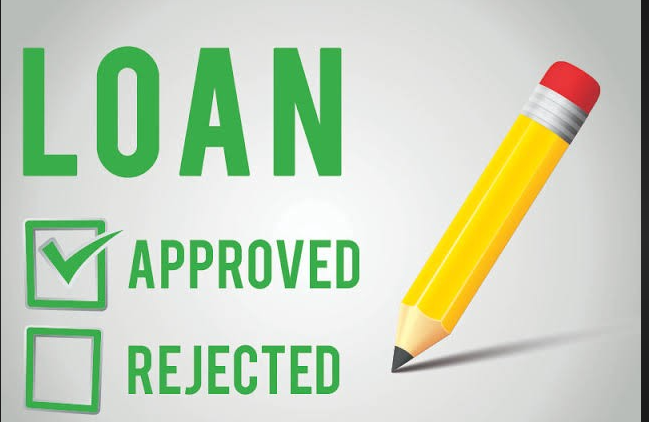

In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# pip install xgboost

In [3]:
data = pd.read_csv("loan_predictions.csv")


In [4]:
data.sample(10)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
344  LP002128    Male     Yes          2      Graduate           NaN   
392  LP002263    Male     Yes          0      Graduate            No   
573  LP002862    Male     Yes          2  Not Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
173  LP001594    Male     Yes          0      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
270  LP001888  Female      No          0      Graduate            No   
109  LP001384    Male     Yes         3+  Not Graduate            No   
561  LP002813  Female     Yes          1      Graduate           Yes   
283  LP001917  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
344             2583             2330.0       125.0             360.0   
392             2583             2115.0       120.0             360.0   
573             6125             1625.0       187.0             480.0   
1               4583             1508.0       128.0             360.0   
173             5708             5625.0       187.0             360.0   
2               3000                0.0        66.0             360.0   
270             3237                0.0        30.0             360.0   
109             2071              754.0        94.0             480.0   
561            19484                0.0       600.0             360.0   
283             1811             1666.0        54.0             360.0   

     Credit_History Property_Area Loan_Status  
344             1.0         Rural           Y  
392             NaN         Urban           Y  
573             1.0     Semiurban           N  
1               1.0         Rural           N  
173             1.0     Semiurban           Y  
2               1.0         Urban           Y  
270             1.0         Urban           Y  
109             1.0     Semiurban           Y  
561             1.0     Semiurban           Y  
283             1.0         Urban           Y

In [5]:
data.shape

(619, 13)

In [6]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       619.000000         619.000000  597.000000        605.000000   
mean       5401.835218        1621.074184  147.269682        341.851240   
std        6085.184459        2928.566488   85.897488         65.200742   
min         150.000000           0.000000    9.000000         12.000000   
25%        2885.500000           0.000000  100.000000        360.000000   
50%        3814.000000        1131.000000  128.000000        360.000000   
75%        5790.000000        2292.500000  170.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      569.000000  
mean         0.836555  
std          0.370096  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [7]:
data['Gender'].value_counts()

Gender
Male      493
Female    113
Name: count, dtype: int64

In [8]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

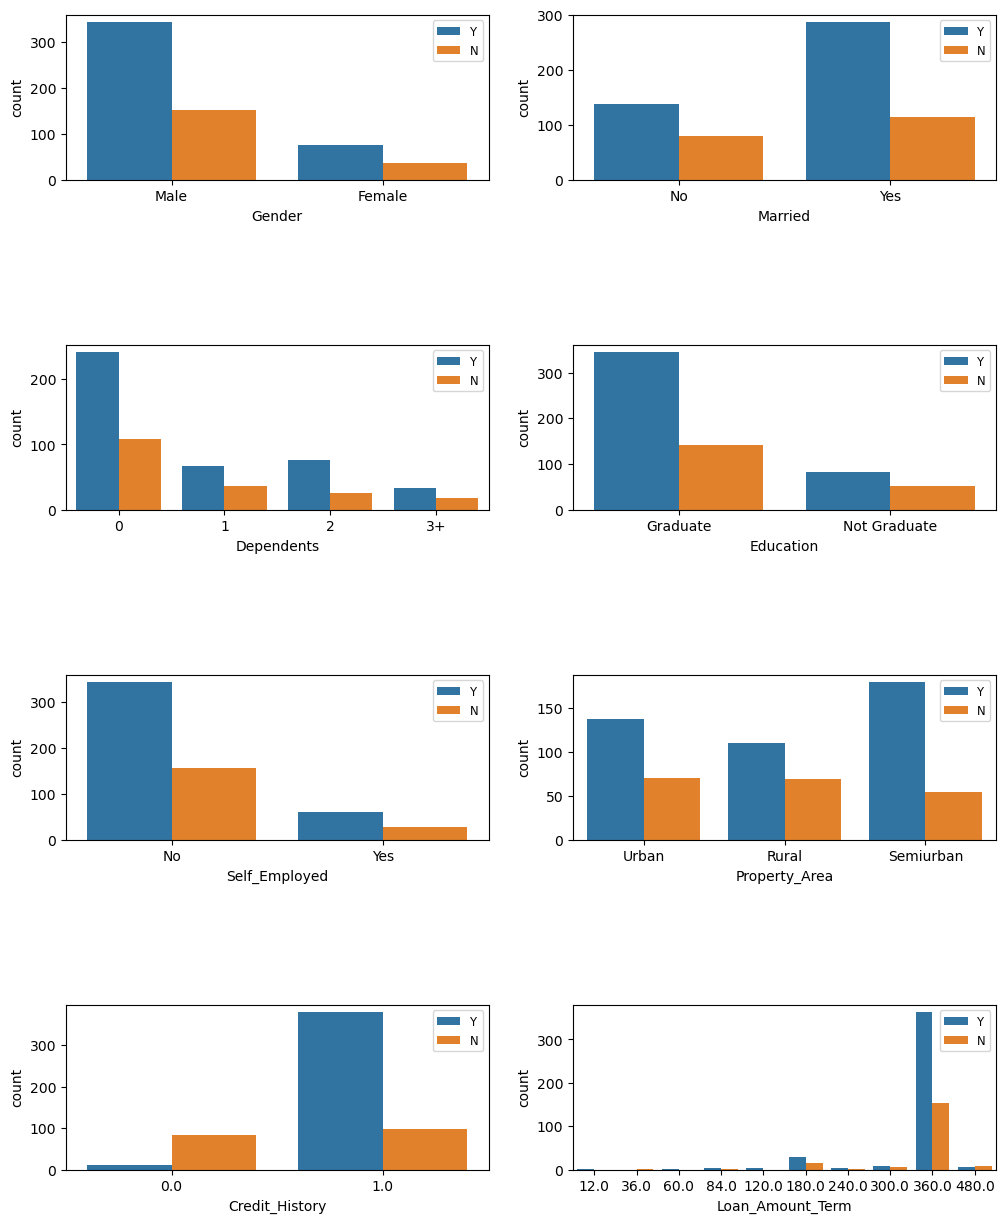

In [9]:

fig, axes = plt.subplots(4, 2, figsize=(12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=data, hue='Loan_Status', ax=axes[row, col])
    axes[row, col].legend(fontsize='small')  # Set the fontsize for the legend

plt.subplots_adjust(hspace=1)
plt.show()


In [10]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       619.000000         619.000000  597.000000
mean       5401.835218        1621.074184  147.269682
std        6085.184459        2928.566488   85.897488
min         150.000000           0.000000    9.000000
25%        2885.500000           0.000000  100.000000
50%        3814.000000        1131.000000  128.000000
75%        5790.000000        2292.500000  170.000000
max       81000.000000       41667.000000  700.000000


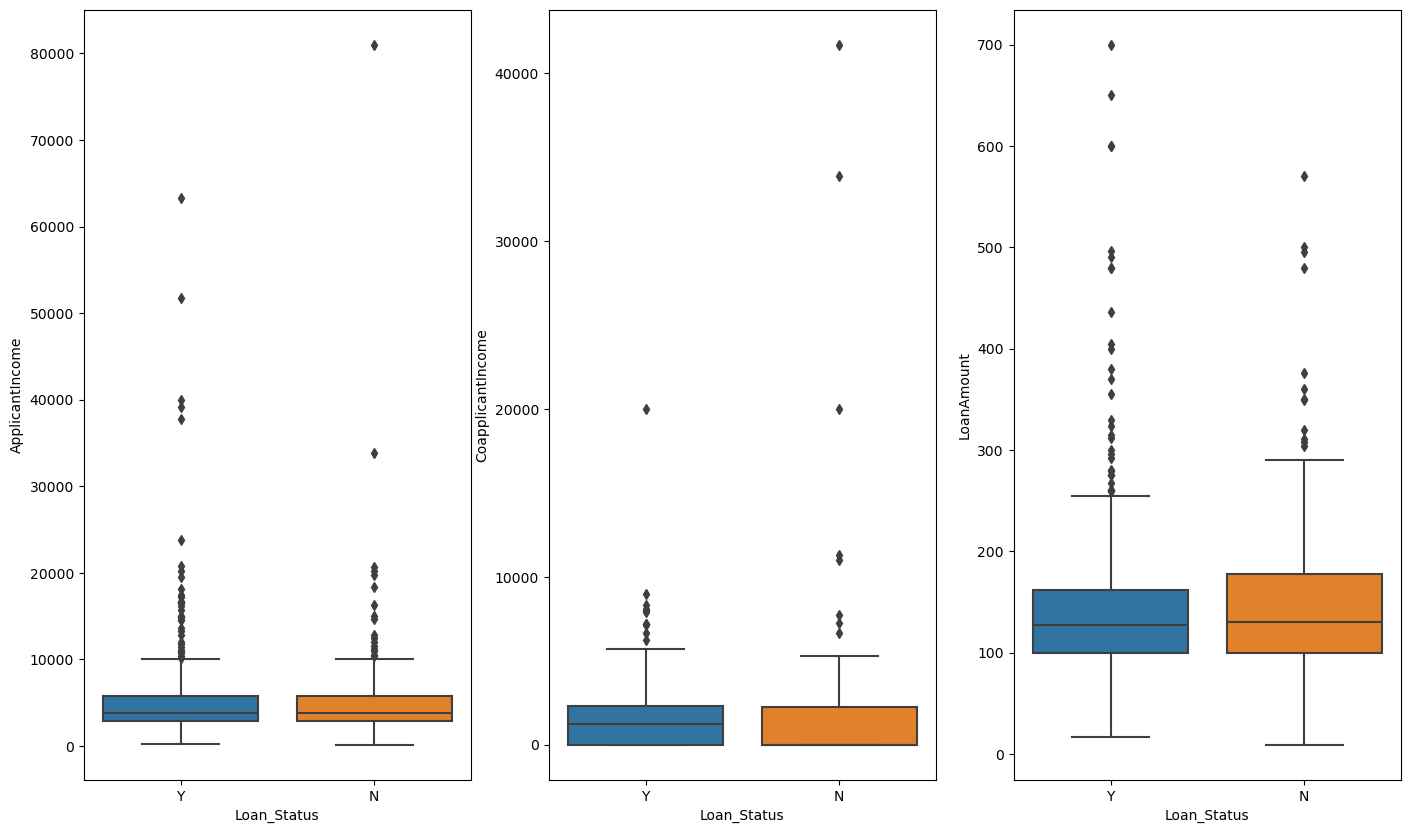

In [11]:
fig,axes = plt.subplots(1,3,figsize=(17,10))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is no significant relation to Loan approval status.

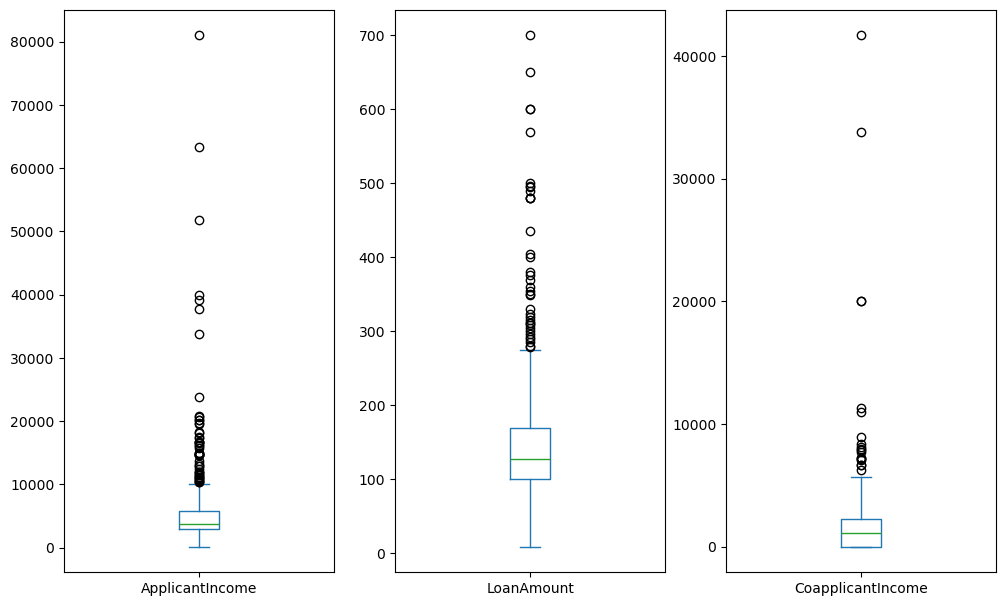

In [12]:
plt.subplot(131)
data['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
data['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
data['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

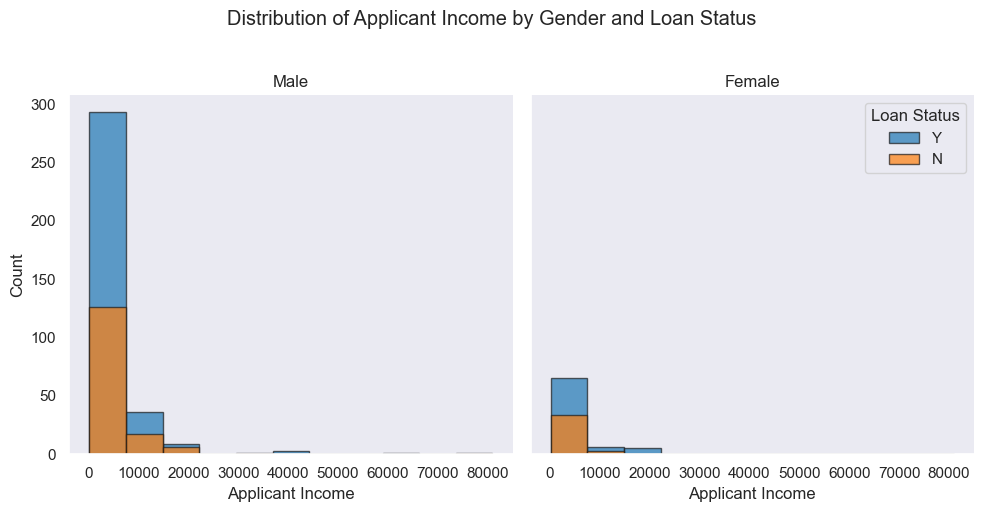

In [13]:
custom_palette = sns.color_palette("tab10", 2)
bins = np.linspace(data['ApplicantIncome'].min(), data['ApplicantIncome'].max(), 12)
sns.set(style="dark")
graph = sns.FacetGrid(data, col="Gender", hue="Loan_Status", palette=custom_palette, col_wrap=2, height=5)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k", alpha=0.7)
graph.set_titles(col_template="{col_name}")
graph.axes[-1].legend(title='Loan Status', loc='upper right')
graph.set_axis_labels("Applicant Income", "Count")
graph.fig.suptitle("Distribution of Applicant Income by Gender and Loan Status", y=1.02)
plt.tight_layout()
plt.show()

In [14]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
#All values of "Dependents" columns were of "str" form now converting to "int" form.
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))


In [16]:
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

In [17]:
data.drop(["Loan_ID"],axis=1 , inplace=True)

In [18]:
correlation_mat = data.corr()

<Axes: >

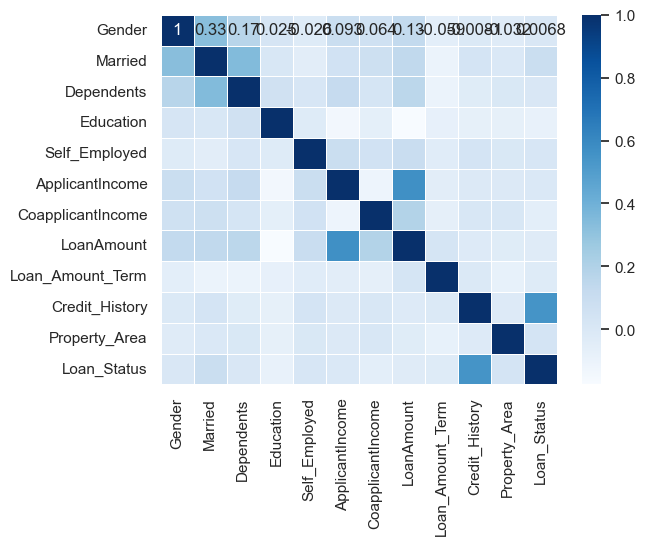

In [19]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="Blues")

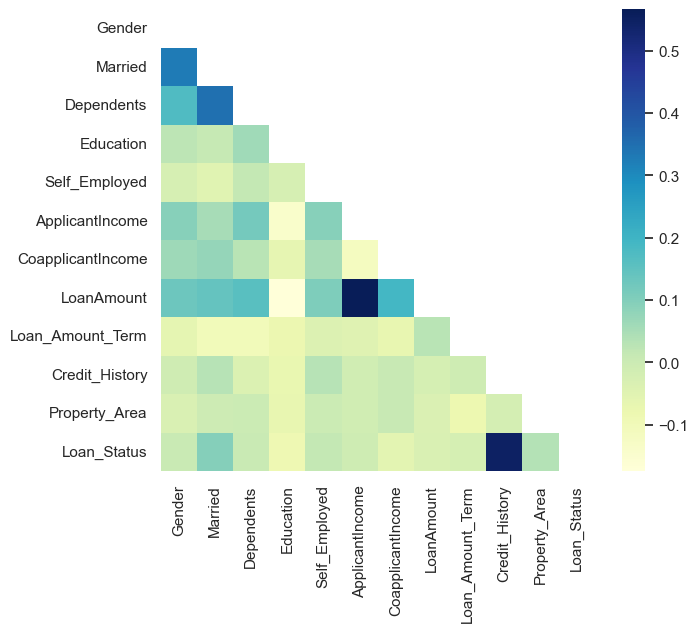

In [20]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

### There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             619 non-null    int32  
 1   Married            619 non-null    int32  
 2   Dependents         604 non-null    float64
 3   Education          619 non-null    int32  
 4   Self_Employed      619 non-null    int32  
 5   ApplicantIncome    619 non-null    int64  
 6   CoapplicantIncome  619 non-null    float64
 7   LoanAmount         597 non-null    float64
 8   Loan_Amount_Term   605 non-null    float64
 9   Credit_History     569 non-null    float64
 10  Property_Area      619 non-null    int32  
 11  Loan_Status        619 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 43.7 KB


In [22]:
data.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

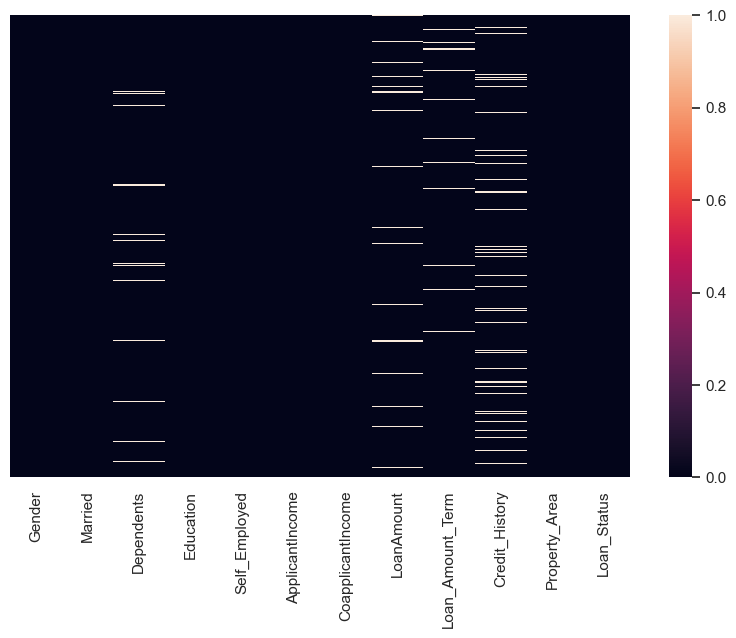

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [24]:
### Checking if the non-categorical variables are Normally Distributed or Not. i.e. Checking outliers...

print("Data distribution analysis:->---------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))



Data distribution analysis:->---------------------------------------


Mean:->

ApplicantIncome:  5401.8352180937
CoapplicantIncome:  1621.0741841496606
LoanAmount:  147.26968174204356

Mode:->

ApplicantIncome:  2500
CoapplicantIncome:  0.0
LoanAmount:  nan

Median:->

ApplicantIncome:  3814.0
CoapplicantIncome:  1131.0
LoanAmount:  nan

Standard Deviation:->

ApplicantIncome:  6080.267137017877
CoapplicantIncome:  2926.19996883503
LoanAmount:  85.82551717910692


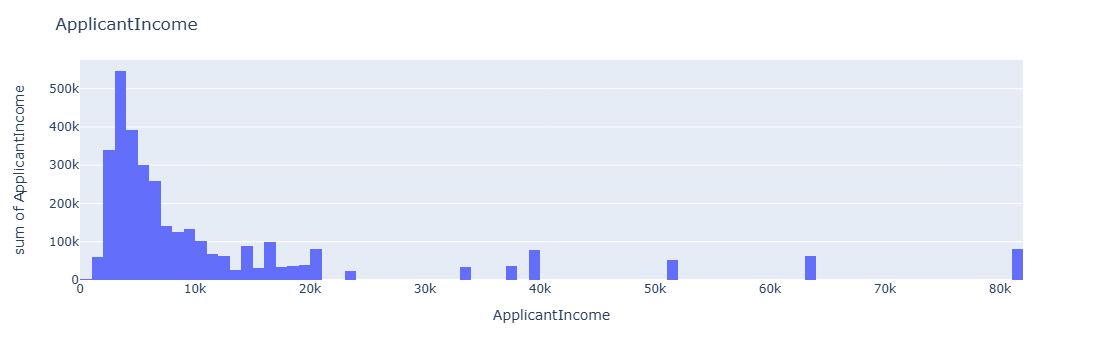

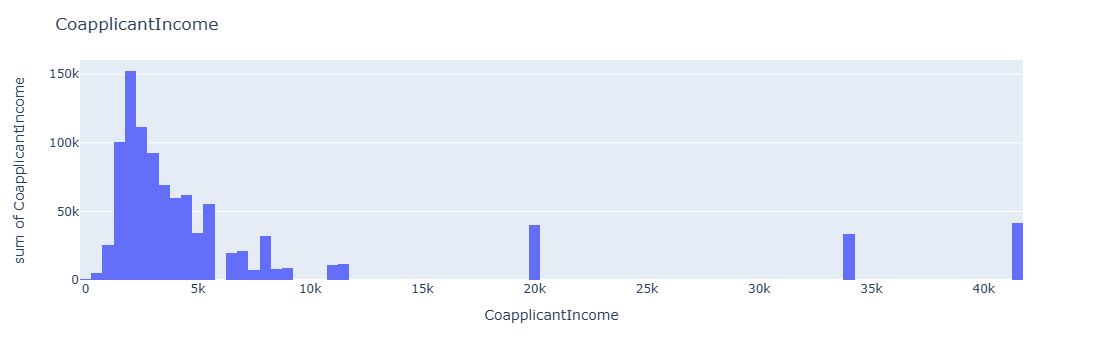

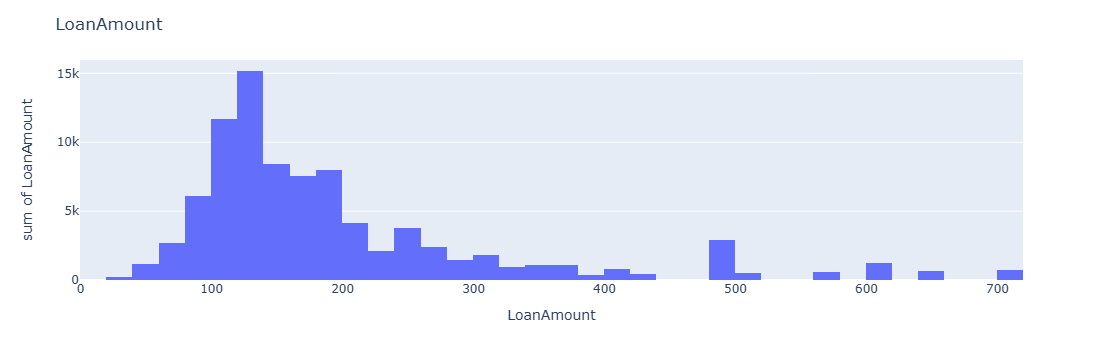

In [25]:
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()


### Not normaly distributed.



Prepare data for model training i.e. removing ouliers , filling null values , removing skewness

In [26]:
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

Gender
1    493
0    113
2     13
Name: count, dtype: int64
Married
1    399
0    217
2      3
Name: count, dtype: int64
Self_Employed
0    500
1     87
2     32
Name: count, dtype: int64
Dependents
0.0    349
1.0    103
2.0    101
3.0     51
Name: count, dtype: int64
Credit_History
1.0    476
0.0     93
Name: count, dtype: int64
Loan_Amount_Term
360.0    516
180.0     45
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

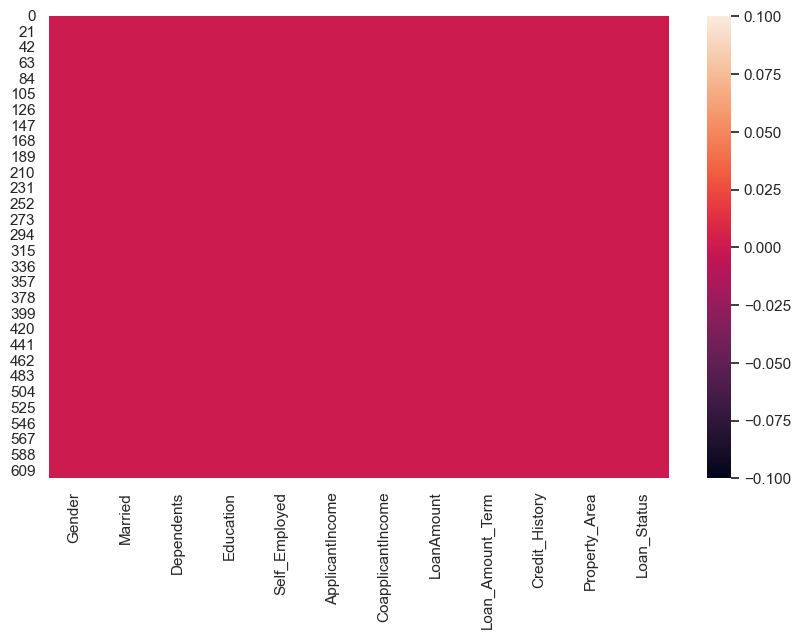

In [27]:
#Filling all Nan values with mode of respective variable
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)


data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [28]:
#Treating outliers and Converting data to Normal Distribution
#Before removing outlier

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))



Mean:->

ApplicantIncome:  5401.8352180937
CoapplicantIncome:  1621.0741841496606
LoanAmount:  146.58481421647818

Mode:->

ApplicantIncome:  2500
CoapplicantIncome:  0.0
LoanAmount:  128.0

Median:->

ApplicantIncome:  3814.0
CoapplicantIncome:  1131.0
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6080.267137017877
CoapplicantIncome:  2926.19996883503
LoanAmount:  84.36201988715327


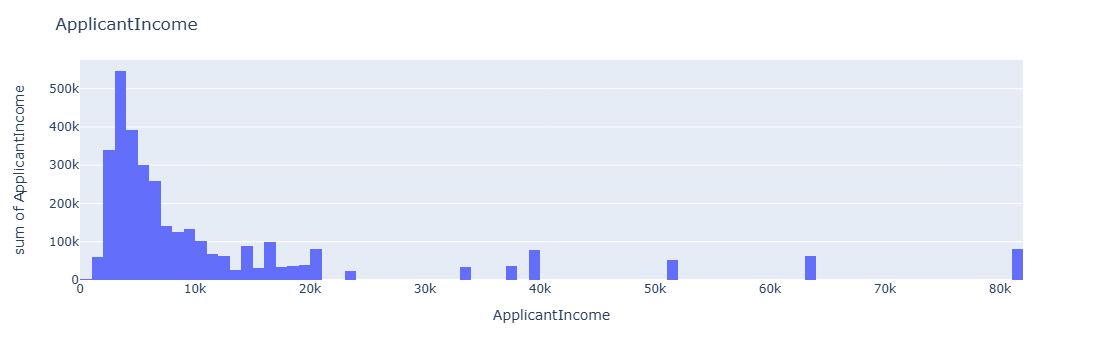

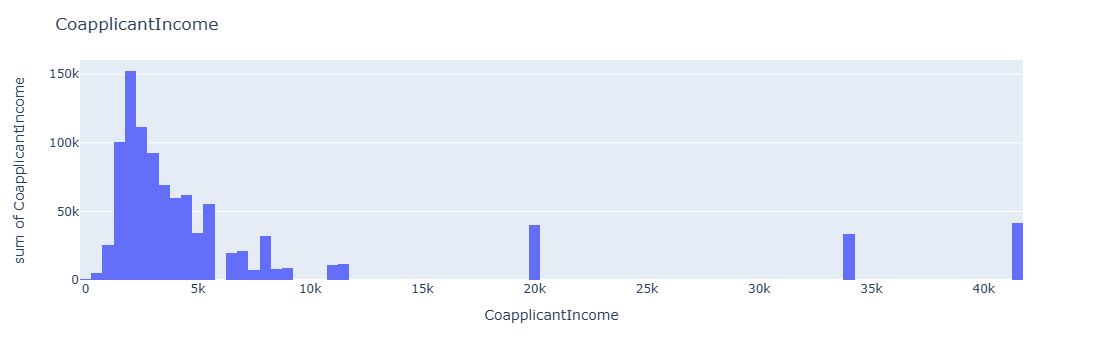

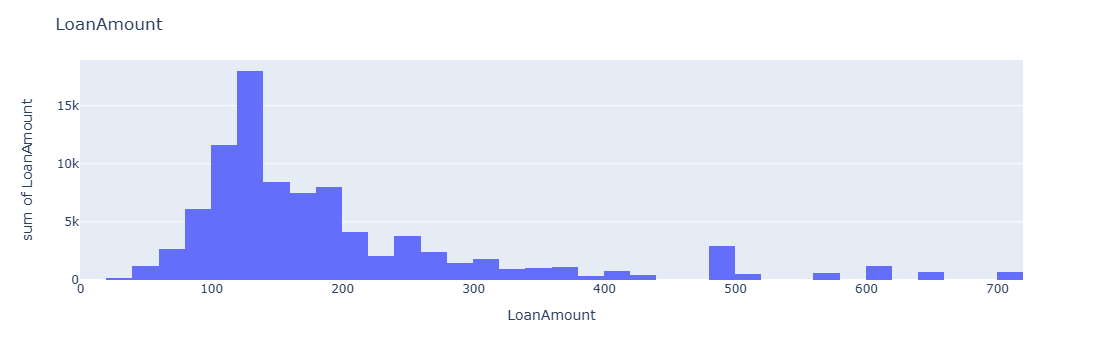

In [29]:
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()


In [30]:
####################################################################################################
#Getting log value :->

data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]
data["LoanAmount"] = np.log(data["LoanAmount"])
####################################################################################################


In [31]:
print("---------------------------After converting to Normal Distributed data----------------------")

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))



---------------------------After converting to Normal Distributed data----------------------

Mean:->

ApplicantIncome:  8.342752154392272
CoapplicantIncome:  4.26960161341259
LoanAmount:  4.8623850268201965

Mode:->

ApplicantIncome:  7.824046010856292
CoapplicantIncome:  0.0
LoanAmount:  4.852030263919617

Median:->

ApplicantIncome:  8.246433786160365
CoapplicantIncome:  7.030857476116121
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.64267643496876
CoapplicantIncome:  3.876783834334877
LoanAmount:  0.49722036724412705


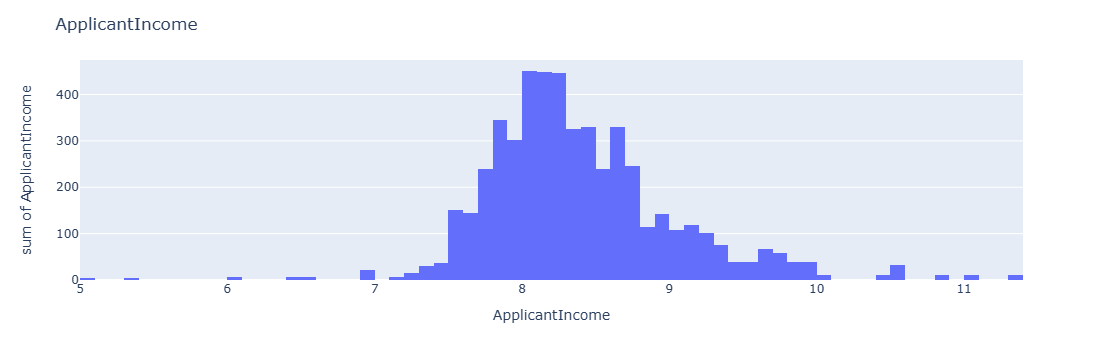

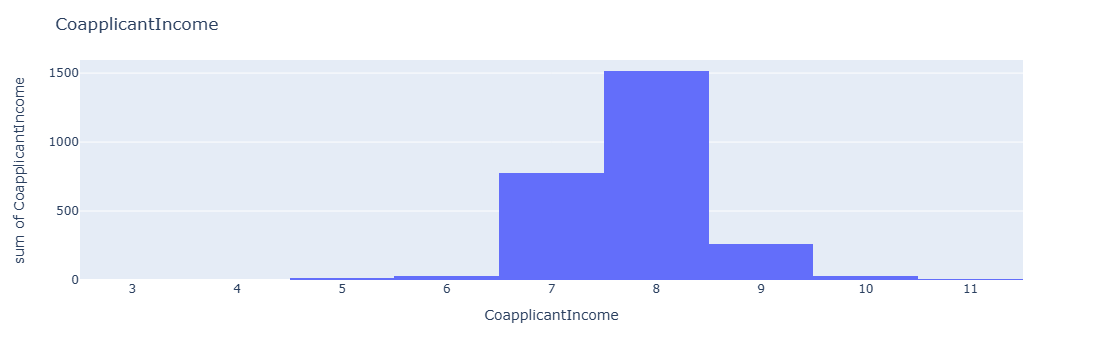

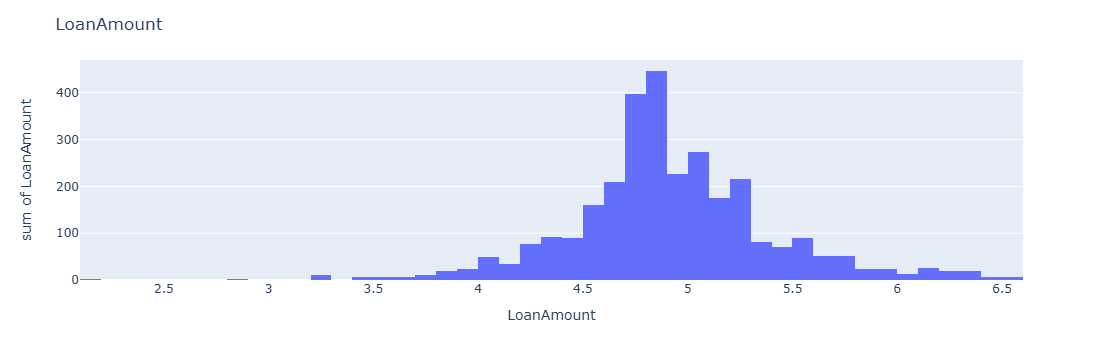

<Figure size 1000x400 with 0 Axes>

In [32]:
plt.figure(figsize=(10,4))
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

Now we can see that Bell Curve for all three variables and data is normally distributed now.

In [33]:
data.head(5)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          0              0         8.674026   
1       1        1         1.0          0              0         8.430109   
2       1        1         0.0          0              1         8.006368   
3       1        1         0.0          1              0         7.856707   
4       1        0         0.0          0              0         8.699515   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    4.852030             360.0             1.0   
1           7.318540    4.852030             360.0             1.0   
2           0.000000    4.189655             360.0             1.0   
3           7.765569    4.787492             360.0             1.0   
4           0.000000    4.948760             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

In [34]:
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

#data = pd.get_dummies(data)
data.head(5)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0         0.0          0              0         8.674026   
1       1        1         1.0          0              0         8.430109   
2       1        1         0.0          0              1         8.006368   
3       1        1         0.0          1              0         7.856707   
4       1        0         0.0          0              0         8.699515   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    4.852030             360.0             1.0   
1           7.318540    4.852030             360.0             1.0   
2           0.000000    4.189655             360.0             1.0   
3           7.765569    4.787492             360.0             1.0   
4           0.000000    4.948760             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

Feature Importance
In order to create best predictive model we need to best understand the available data and get most information from the data.

In multivariate data it is important to understand the iortance of varialbes and how much they are contributing towards the target variable. Such that we can remove unnecessary variables to increase model performance.

Many times dataset consists of exta columns which do not identically serve information to classify the data. This leads in Wrong Assumption of model while training.

To understand the importance of the data we are going to use Machine Learning classifiers and then will plot bar graph based on importance.

Also XGBoost has built-in Feature Importance Plotting tool which we are going to use.

Using more than one classifier will increase the confidence on our assumption of which variables to keep and which to remove.

In [35]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["Loan_Status"],axis=1)
y = data["Loan_Status"]

In [36]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)

Feature importance by XGBoost:->

Gender -> 0.04325043
Married -> 0.04165696
Dependents -> 0.040282283
Education -> 0.0677525
Self_Employed -> 0.03324022
ApplicantIncome -> 0.04612191
CoapplicantIncome -> 0.05199214
LoanAmount -> 0.04371265
Loan_Amount_Term -> 0.059972234
Credit_History -> 0.5245575
Property_Area -> 0.04746121


Feature importance by XGBoost:->

Gender -> 0.04325043
Married -> 0.04165696
Dependents -> 0.040282283
Education -> 0.0677525
Self_Employed -> 0.03324022
ApplicantIncome -> 0.04612191
CoapplicantIncome -> 0.05199214
LoanAmount -> 0.04371265
Loan_Amount_Term -> 0.059972234
Credit_History -> 0.5245575
Property_Area -> 0.04746121


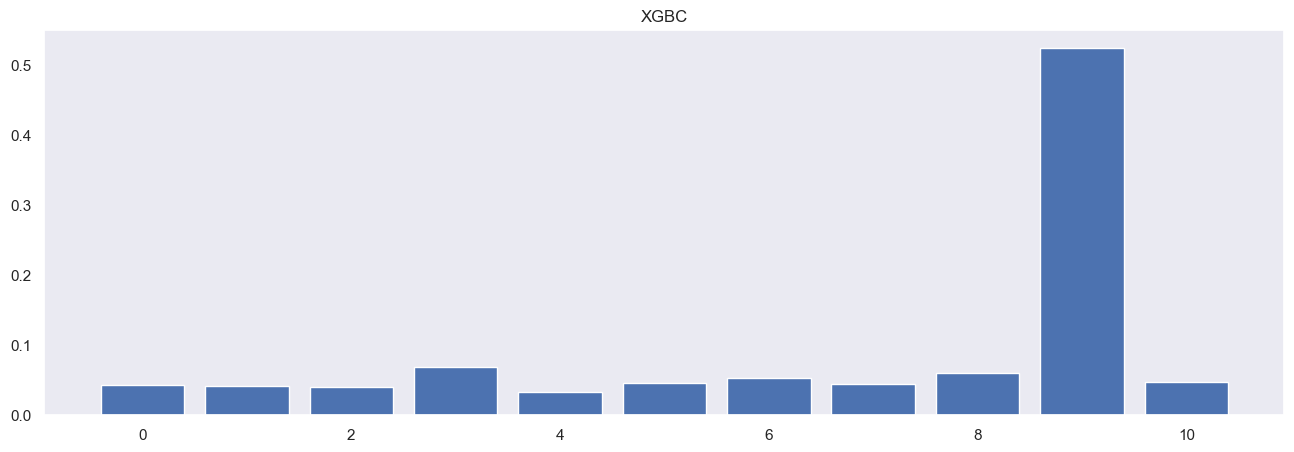

Feature importance by Random Forest:->

Gender -> 0.024215590890811593
Married -> 0.024937216922009932
Dependents -> 0.04544769349717121
Education -> 0.02204574853909483
Self_Employed -> 0.02958805381881323
ApplicantIncome -> 0.20541814084597895
CoapplicantIncome -> 0.11649238643686974
LoanAmount -> 0.19041766038727523
Loan_Amount_Term -> 0.039177042822791934
Credit_History -> 0.256598054752379
Property_Area -> 0.045662411086804515


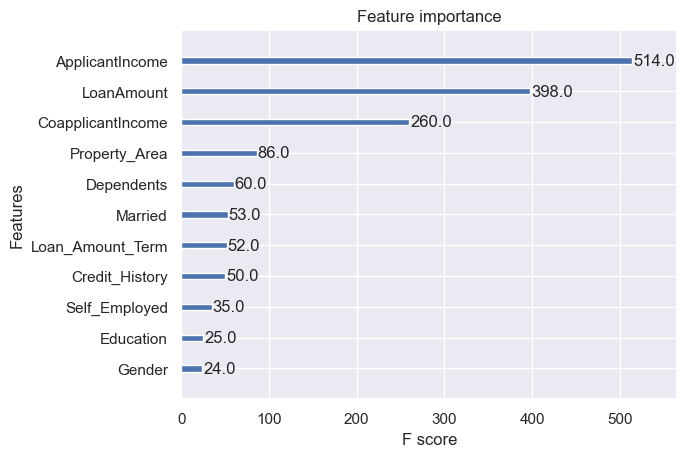

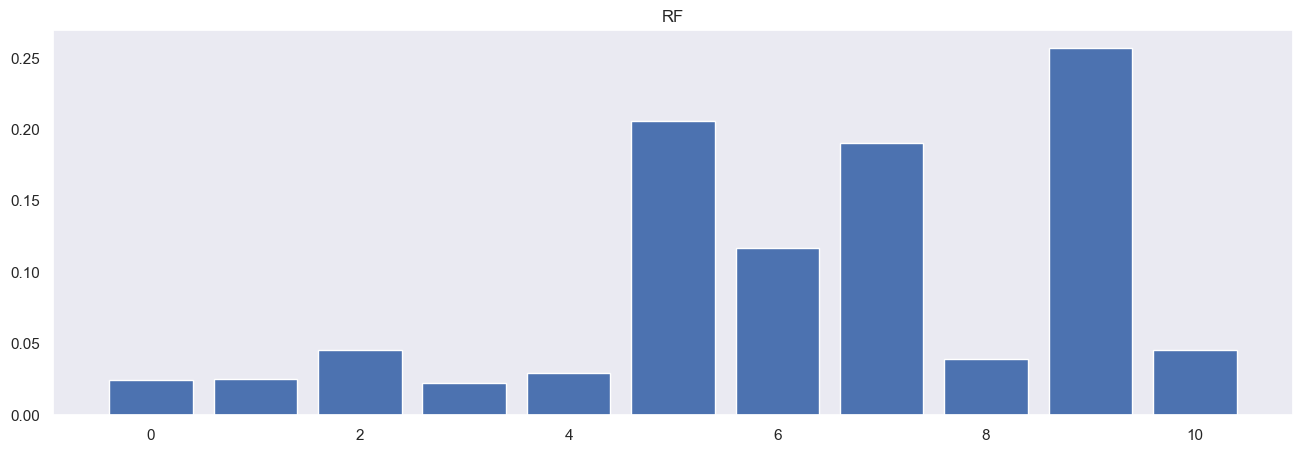

Feature importance by Decision Tree:->

Gender -> 0.015130016139128647
Married -> 0.018885732581336485
Dependents -> 0.053030741976473186
Education -> 0.011459575624084421
Self_Employed -> 0.03952011234177788
ApplicantIncome -> 0.21521174793697997
CoapplicantIncome -> 0.11126652309120953
LoanAmount -> 0.1961512385930155
Loan_Amount_Term -> 0.03304102529451971
Credit_History -> 0.2778338686177816
Property_Area -> 0.028469417803693012


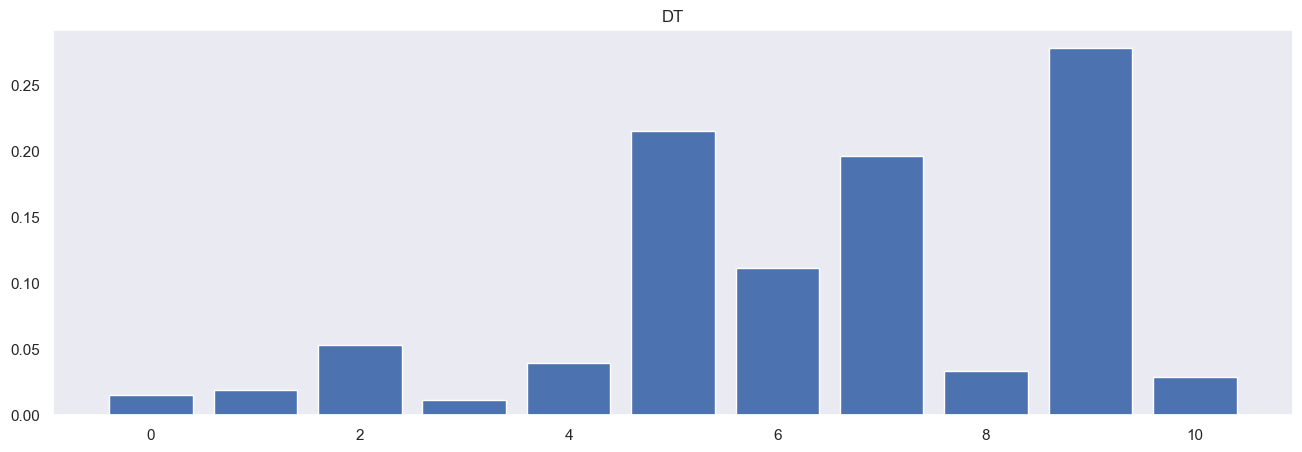

Feature importance by Suppoprt Vector Machine:->

Gender -> 0.002084896579530593
Married -> 0.010477381931973229
Dependents -> -0.0006596759404398078
Education -> -0.007109287694590405
Self_Employed -> -0.010742517759686265
ApplicantIncome -> 0.0011307715192643286
CoapplicantIncome -> 0.0002127361513770687
LoanAmount -> -0.008160331187188063
Loan_Amount_Term -> 8.313912712765159e-05
Credit_History -> 2.072022361284608
Property_Area -> -0.002208160936737258


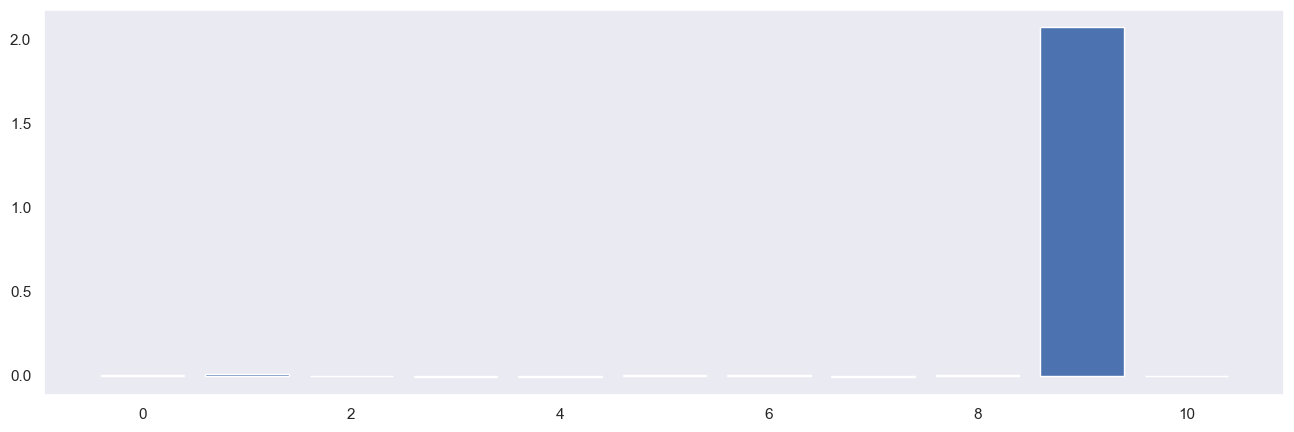

Feature importance by Logistic Regression:->

Gender -> -0.09147017279360457
Married -> 0.36634456019882655
Dependents -> 0.03582006154045547
Education -> -0.40804770340481117
Self_Employed -> 0.028000999423956643
ApplicantIncome -> 0.026179427977010537
CoapplicantIncome -> 0.030291196472714357
LoanAmount -> -0.35416824823931814
Loan_Amount_Term -> -0.0011288786839992978
Credit_History -> 3.063112436966842
Property_Area -> 0.10783792470908889


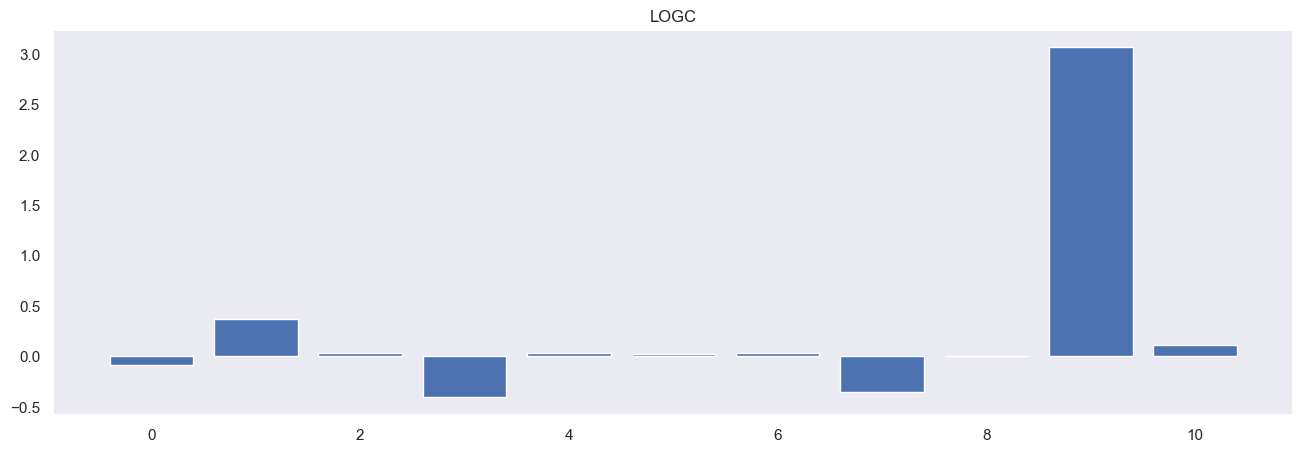

In [37]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_

Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

From feature importance => Credit History , ApplicantIncome , CoapplicantIncome, LoanAmount are the most important features

### Is data Balanced ?

<Axes: >

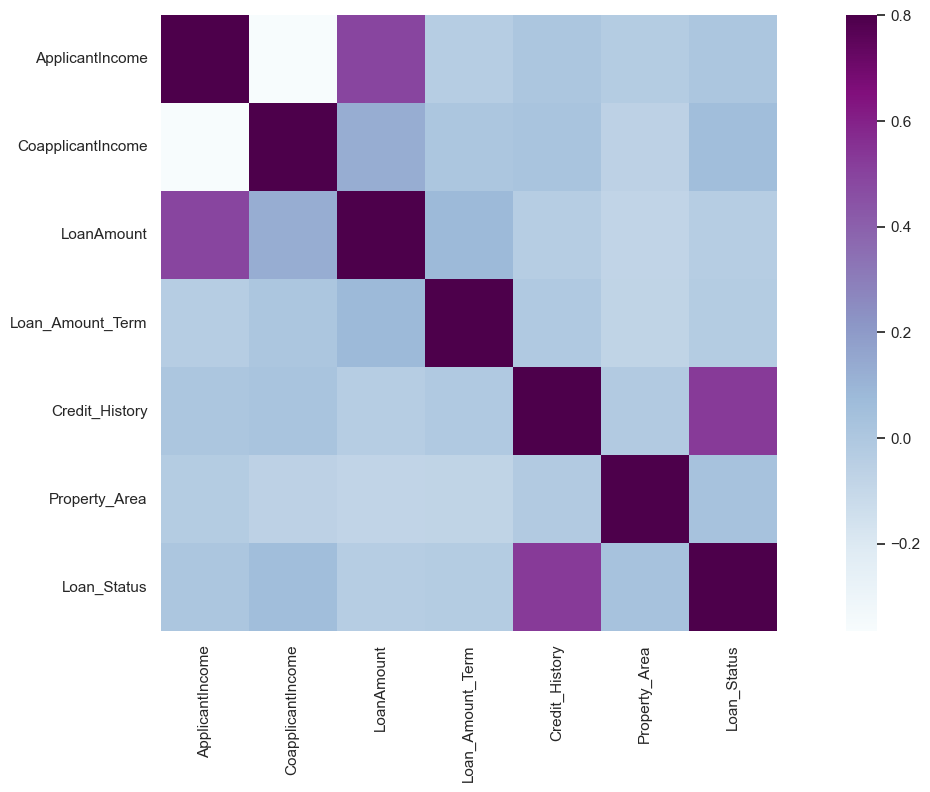

In [38]:
#Heat map of dataset with relative importance
matrix = data.drop(["Gender","Married","Dependents","Education","Self_Employed"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

In [39]:
data.dtypes

Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


It seems Application income and Loan Amount is correlated , also Coapplication income correlated with Loan Aount then Credit history is corrleated with Loan Status

Count of 1<Approved>:  426 
Count of 0<Rejected>:  193


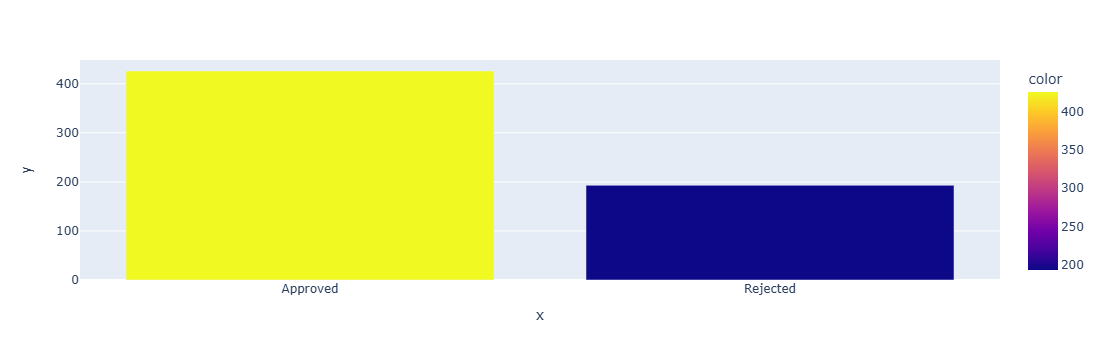

In [40]:
A = list(data.Loan_Status).count(1)
B = list(data.Loan_Status).count(0)
print("Count of 1<Approved>: ",A,"\nCount of 0<Rejected>: ",B)

fig = px.bar((A,B),x=["Approved","Rejected"],y=[A,B],color=[A,B])
fig.show()

It seems that data is highly Imbalanced.

When the target classes does not have equal count then the data is considered as imbalanced data.

From above graph it seems that dataset contains more records with Approved Loan_Status than Rejected Loan_Status. 422 over 192

If data would have maximum of 20-30 records difference that time this imabalnced would be ignorable.

Which will lead to make wrong assumptions by model and also model will be biased after training. We will overcome this issue by balancing the data.

To overcome this problem we will balance the data using Resampling technique with Upsample and Downsample.

In [41]:
#To keep original data as it is to use the same for later.
new_data = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=193,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=426,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 Loan_Status
1    193
0    193
Name: count, dtype: int64
Upsampled data:->
 Loan_Status
1    426
0    426
Name: count, dtype: int64


Data Standardization / Normalization
Data normalization is required when the vriable values are in very distinct range.

For Ex. Suppose we have 2 columns "Age" and "Income"

Where value range of "Age" lying in 0-100 Approx. and value range of "Income" lying in 20,000 to 100,000

At this time model will perform poorly on testig data as all input values are not in same value range.

So not every time but whenever we get such type of data we need to normalized it i.e. Rescale it.

Widely used scaling tools are Min-Max Scaler and Standard-Scaler

Data Normalization is done by Min-Max Scaler which scales all th values between 0 to 1 range.

Data standardization is done by Standard-Scaler which scales the data so that Mean of observed data is 0 and Standard Deviation is 1.

As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that it will reduce more skewness and contribute in accuracy gain.

Experimental Modeling
In order to gain maximum posible accuracy one needs to conduct much emor experiments.

We will pass data on by one with different state i.e.

-Only Scaled data

-Scaled + Down Sampled Data

-Scaled + Up Sampled Data

-Scaled + Up Sampled Data + Selected feature with respective importance.

In [42]:
#Experiment 1: Only Scaled data with all variables


X = new_data.drop(["Loan_Status"],axis=1)
y = new_data["Loan_Status"]
counter = Counter(y)
print("Counter: ",counter)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
  min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

Counter:  Counter({1: 426, 0: 193})
After Standardization
Mean  -4.4374117755394185e-17 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.44      0.69      0.54        32
           1       0.90      0.77      0.83       123

    accuracy                           0.75       155
   macro avg       0.67      0.73      0.68       155
weighted avg       0.81      0.75      0.77       155

Voting Ensemble:> 0.7548387096774194
              precision    recall  f1-score   support

           0       0.46      0.85      0.60        27
           1       0.96      0.79      0.87       128

    accuracy                           0.80       155
   macro avg       0.71      0.82      0.73       155
weighted avg       0.87      0.80      0.82       155

SVM:> 0.8
              precision    recall  f1-score   support

           0       0.30      0.45      0.36        33
           1       0.83      0.71      0.77       122

    accuracy         

In [43]:
#Experiment 2: Sclaed + Down Sampled Data

#X = df_downsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_downsampled.drop(["Loan_Status"],axis=1)
y = df_downsampled.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False,)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

After Standardization
Mean  -1.3913584555226876e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        44
           1       0.77      0.68      0.72        53

    accuracy                           0.71        97
   macro avg       0.71      0.71      0.71        97
weighted avg       0.72      0.71      0.71        97

Voting Ensemble:> 0.711340206185567
              precision    recall  f1-score   support

           0       0.46      0.96      0.62        24
           1       0.98      0.63      0.77        73

    accuracy                           0.71        97
   macro avg       0.72      0.79      0.69        97
weighted avg       0.85      0.71      0.73        97

SVM:> 0.711340206185567
              precision    recall  f1-score   support

           0       0.36      0.55      0.43        33
           1       0.68      0.50      0.58        64

    accuracy                           0.52 

In [44]:
X = df_upsampled.drop(["Loan_Status"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


852 852


In [59]:
#Experiment 3: Sclaed + Up Sampled Data

#X = df_upsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_upsampled.drop(["Loan_Status"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

852 852
After Standardization
Mean  2.2163393770863845e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.60      0.86      0.71        78
           1       0.89      0.67      0.76       135

    accuracy                           0.74       213
   macro avg       0.74      0.76      0.73       213
weighted avg       0.78      0.74      0.74       213

Voting Ensemble:> 0.7370892018779343
              precision    recall  f1-score   support

           0       0.41      0.94      0.57        49
           1       0.97      0.60      0.74       164

    accuracy                           0.68       213
   macro avg       0.69      0.77      0.66       213
weighted avg       0.84      0.68      0.70       213

SVM:> 0.676056338028169
              precision    recall  f1-score   support

           0       0.53      0.78      0.63        76
           1       0.83      0.61      0.71       137

    accuracy                        

In [63]:
X = df_upsampled.drop(["Loan_Status"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)


Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

852 852
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        96
           1       0.88      0.76      0.82       117

    accuracy                           0.81       213
   macro avg       0.82      0.82      0.81       213
weighted avg       0.82      0.81      0.81       213

RandomForestClassifier:> 0.812206572769953


In [64]:
import joblib

In [61]:
joblib.dump(StSc, 'scaler.pkl')

['scaler.pkl']

In [65]:
joblib.dump(Model1, 'Loan_Prediction.pkl')

['Loan_Prediction.pkl']

In [46]:
import pickle

In [47]:
with open('Loan_Prediction.pkl', 'wb') as file:
    pickle.dump(Model1, file)

In [48]:
with open('Loan_Prediction.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [49]:
X = df_upsampled.drop(["Loan_Status"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# StSc = StandardScaler()
# X_train  = StSc.fit_transform(X_train)
# X_test  = StSc.fit_transform(X_test)

852 852


In [50]:
man = X_test.head(1)
man

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
202       1        1         3.0          1              0         8.292048   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
202                0.0     4.85203             180.0             1.0   

     Property_Area  
202              2

In [51]:
X_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [52]:
man  = StSc.fit_transform(man)

In [53]:
predictions = loaded_model.predict_proba(man)
print(predictions)

# if predictions == 1:
#     print("Apporved")
# else:
#     print("Rejected")

if predictions[0][0] >predictions[0][1]:
    print("Rejected")
else:
    print("Apporved")


[[0.085 0.915]]
Apporved


In [54]:
edrftgyhuj

NameError: name 'edrftgyhuj' is not defined

In [ ]:
# Experiment 4: Sclaed + Selected features with respective importance
#Droping features which are less important and keeping features as per importance analysis.
X = new_data.drop(["Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
#X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))